In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.decomposition import PCA

### Loan Data 

In [2]:
prj=pd.read_csv("LoanStats3a.csv")

c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan=prj.copy()

In [4]:
prj.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan.shape

(42538, 63)

In [6]:
loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,0.0,0.0,N,N,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
loan.shape

(42538, 63)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
loan.drop(['mths_since_last_delinq','mths_since_last_record','collections_12_mths_ex_med','policy_code','chargeoff_within_12_mths','annual_inc_joint','settlement_status','settlement_date','settlement_amount','settlement_percentage','settlement_term','debt_settlement_flag_date'],axis=1,inplace=True)
loan.drop([39786,39787,39788],axis=0,inplace=True)

In [10]:
loan.shape

(42535, 51)

In [11]:
loan['issued_month'],loan['issued_year']=loan['issue_d'].str.split('-').str
loan[['issue_d','issued_month','issued_year']].head()

,issue_d,issued_month,issued_year
0,Dec-11,Dec,11
1,Dec-11,Dec,11
2,Dec-11,Dec,11
3,Dec-11,Dec,11
4,Dec-11,Dec,11


In [12]:
loan['issued_year']=loan['issued_year'].astype(int)
loan['issued_year']=loan['issued_year']+2000

#### This says that the number f loans are more in 2011 their is  increasing trend in the loan

### LOAN AMOUNT

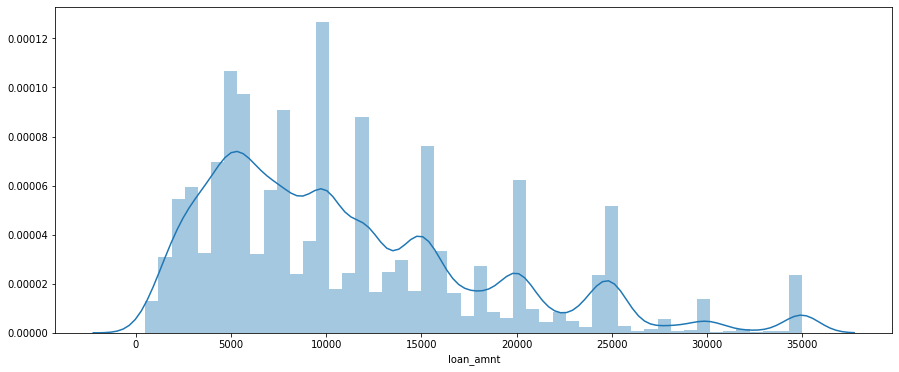

In [13]:
plt.figure(figsize=(15,6))
sns.distplot(loan['loan_amnt']);

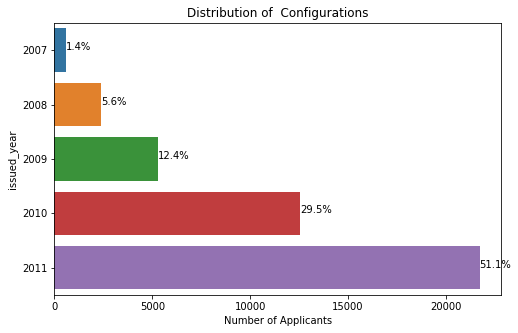

In [14]:
plt.figure(figsize=(8,5))
ax = sns.countplot(y="issued_year", data=loan)
plt.title('Distribution of  Configurations')
plt.xlabel('Number of Applicants')

total = len(loan['issued_year'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

2011    21721
2010    12537
2009     5281
2008     2393
2007      603
Name: issued_year, dtype: int64

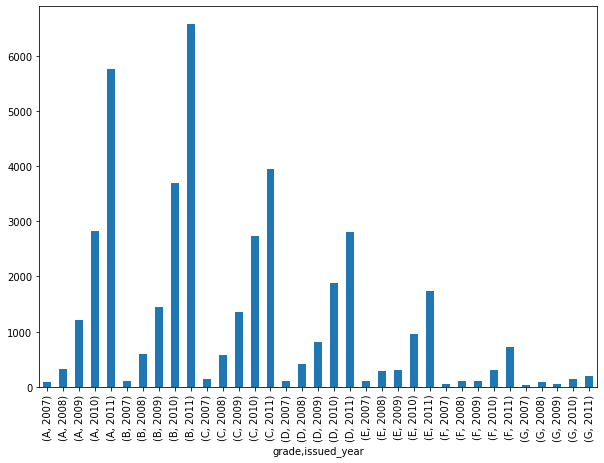

In [15]:
plt.figure(figsize=(10,7))
loan.groupby(['grade','issued_year'])['loan_amnt'].count().plot(kind='bar')

loan['issued_year'].value_counts()

2011    21721
2010    12537
2009     5281
2008     2393
2007      603
Name: issued_year, dtype: int64

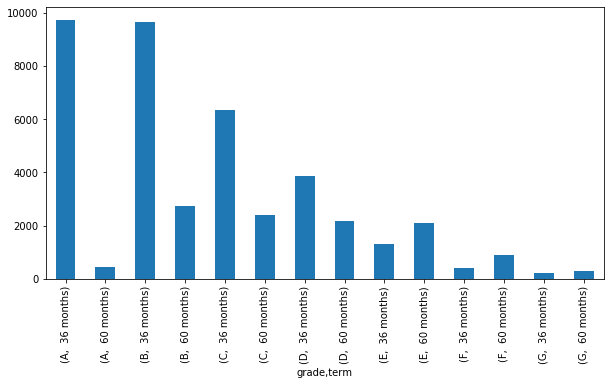

In [16]:
plt.figure(figsize=(10,5))
loan.groupby(['grade','term'])['loan_amnt'].count().plot(kind='bar')

loan['issued_year'].value_counts()

2011    21721
2010    12537
2009     5281
2008     2393
2007      603
Name: issued_year, dtype: int64

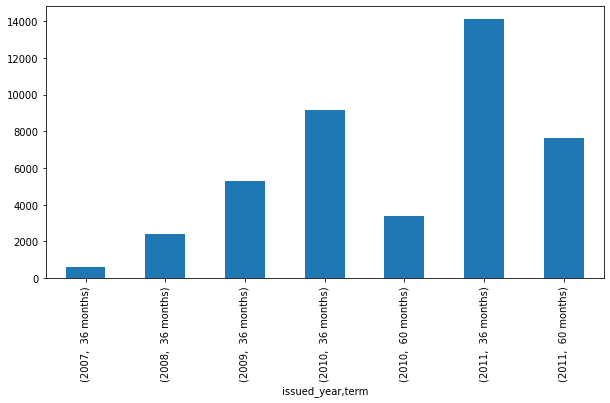

In [17]:
plt.figure(figsize=(10,5))
loan.groupby(['issued_year','term'])['loan_amnt'].count().plot(kind='bar')

loan['issued_year'].value_counts()

In [18]:
loan.groupby(['term','issued_year'])['loan_amnt'].count()

term        issued_year
 36 months  2007             603
            2008            2393
            2009            5281
            2010            9156
            2011           14101
 60 months  2010            3381
            2011            7620
Name: loan_amnt, dtype: int64

In [19]:
(loan.groupby(['issued_year','term'])['loan_amnt'].count())

issued_year  term      
2007          36 months      603
2008          36 months     2393
2009          36 months     5281
2010          36 months     9156
              60 months     3381
2011          36 months    14101
              60 months     7620
Name: loan_amnt, dtype: int64

#### Most of the loans are of duration 3 years and 5 years,Their are more number of applications with a term duration of 3 years

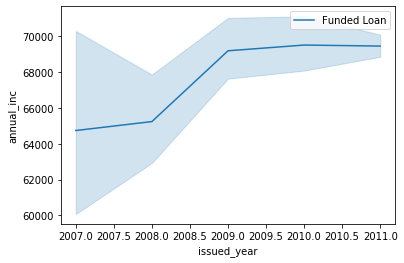

In [20]:
sns.lineplot(loan['issued_year'],loan['annual_inc'],label='Funded Loan');

In [21]:
loan['term'].value_counts()

 36 months    31534
 60 months    11001
Name: term, dtype: int64

#### This tells us that the count of loan requests in term urations that we with different interest rates

In [22]:
loan[['term','grade','funded_amnt','loan_status']].groupby(['loan_status','term','grade']).count().sort_values(['loan_status','term','funded_amnt'],ascending=False)

funded_amnt
loan_status                                        term       grade             
Fully Paid                                          60 months B             2256
                                                              C             1850
                                                              D             1544
                                                              E             1441
                                                              F              576
                                                              A              398
                                                              G              182
                                                    36 months A             9085
                                                              B             8346
                                                              C             4905
                                                              D             2651
                                                              E              692
                                                              F              155
                                                              G               35
Does not meet the credit policy. Status:Fully Paid  60 months E               64
                                                              D               46
                                                              C               28
                                                              F               27
                                                              G               16
                                                              B               15
                                                              A                3
                                                    36 months C              453
                                                              D              448
                                                              E              314
                                                              B              254
                                                              F              127
                                                              G              106
                                                              A               87
Does not meet the credit policy. Status:Charged...  60 months E               39
                                                              D               27
                                                              F               18
                                                              G               14
                                                              C                8
                                                              B                6
                                                    36 months D              170
                                                              C              140
                                                              E              119
                                                              B               79
                                                              F               75
                                                              G               58
                                                              A                8
Charged Off                                         60 months D              550
                                                              E              549
                                                              C              512
                                                              B              448
                                                              F              267
                                                              G               80
                                                              A               37
                   

c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


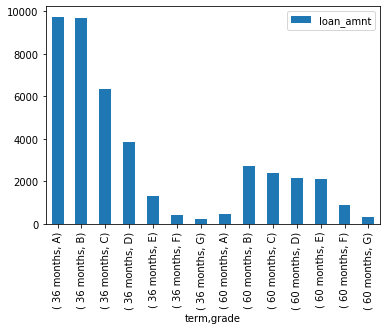

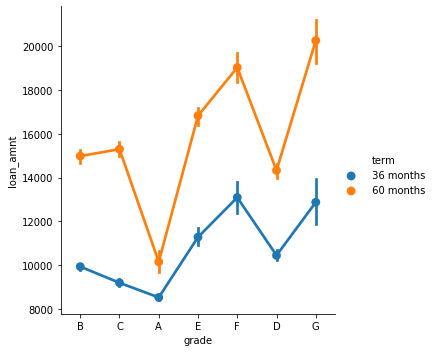

In [23]:
loan[['term','grade','loan_amnt']].groupby(['term','grade']).count().plot(kind='bar');
sns.factorplot('grade','loan_amnt',hue='term',data=loan);

loan_amnt
issued_year term                    
2007         36 months   8254.519071
2008         36 months   8825.428333
2009         36 months   9833.033516
2010         36 months   9801.321538
             60 months  12496.790890
2011         36 months   9421.136799
             60 months  16907.660761

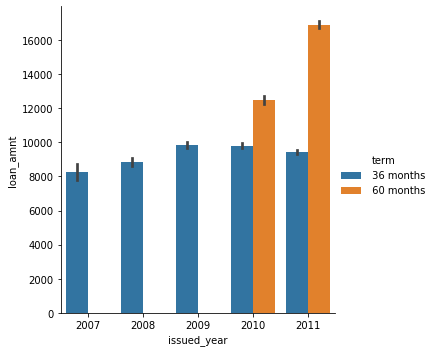

In [24]:
sns.catplot('issued_year','loan_amnt',hue='term',data=loan,kind='bar');
loan[['issued_year','loan_amnt','term']].groupby(['issued_year','term']).mean()

##### This tells us that the loan amount request with 5 years  terms started in 2010 and it is gradualy increasing

### FUNDED AMOUNT 

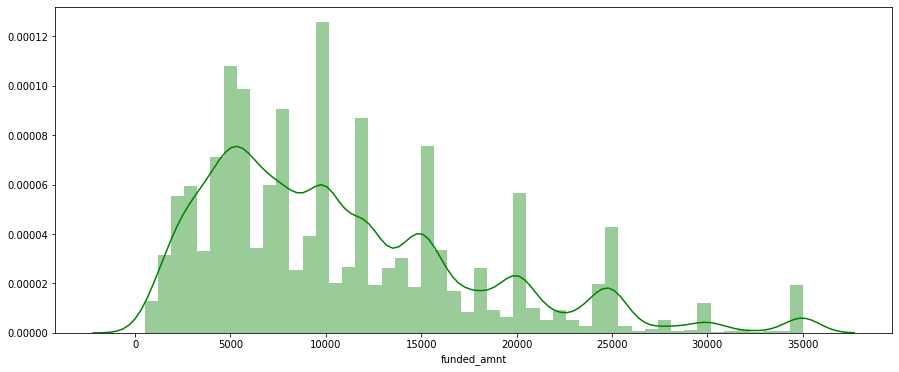

In [25]:
plt.figure(figsize=(15,6))
sns.distplot(loan['funded_amnt'],color='green');

2011    21721
2010    12537
2009     5281
2008     2393
2007      603
Name: issued_year, dtype: int64

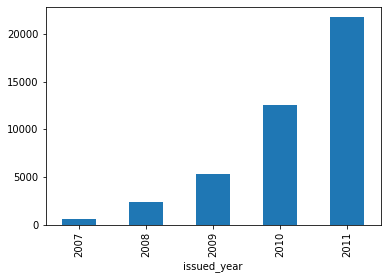

In [26]:
loan.groupby(['issued_year'])['funded_amnt'].count().plot(kind='Bar')
loan['issued_year'].value_counts()

#### Most of the loans are of duration 3 years and 5 years,Their are more number of applications with a term duration of 3 years

#### This tells us that the count of loan requests in term urations that we with different interest rates

In [27]:
loan[['term','grade','funded_amnt',]].groupby(['grade','term']).count()

funded_amnt
grade term                   
A      36 months         9745
       60 months          438
B      36 months         9664
       60 months         2725
C      36 months         6342
       60 months         2398
D      36 months         3849
       60 months         2167
E      36 months         1301
       60 months         2093
F      36 months          413
       60 months          888
G      36 months          220
       60 months          292

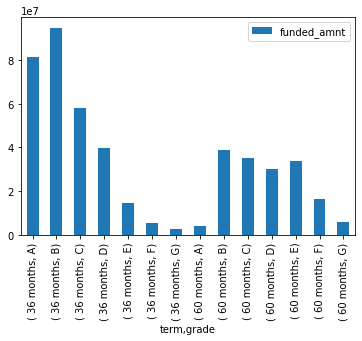

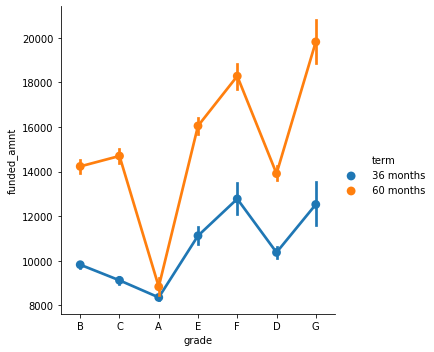

In [28]:
loan[['term','grade','funded_amnt']].groupby(['term','grade']).sum().plot(kind='bar');
sns.factorplot('grade','funded_amnt',hue='term',orient='H',data=loan);

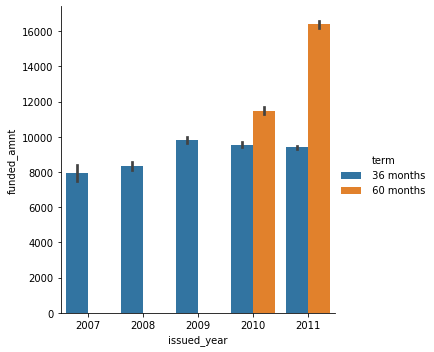

In [29]:
sns.catplot('issued_year','funded_amnt',hue='term',data=loan,kind='bar');

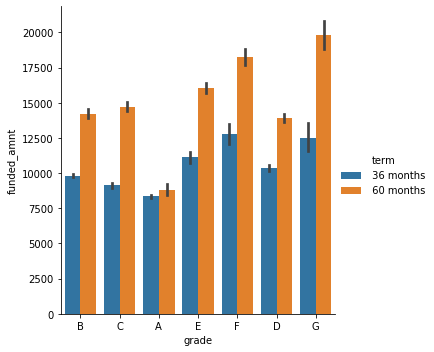

In [30]:
sns.catplot('grade','funded_amnt',hue='term',data=loan,kind='bar');

In [31]:
loan[['issued_year','funded_amnt','term']].groupby(['issued_year','term']).count()

funded_amnt
issued_year term                   
2007         36 months          603
2008         36 months         2393
2009         36 months         5281
2010         36 months         9156
             60 months         3381
2011         36 months        14101
             60 months         7620

In [32]:
loan['int_rate']=loan['int_rate'].str.replace('[^0-9.]','').astype(float)    #treatment for int_rate
loan['int_rate'].head()


0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64

<Figure size 2088x1080 with 0 Axes>

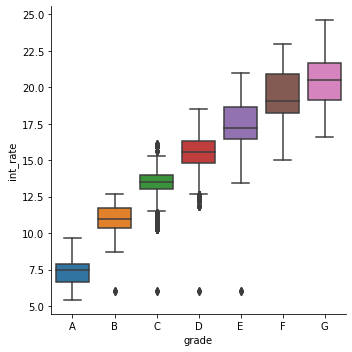

In [33]:
plt.figure(figsize=(29,15))
sns.catplot('grade','int_rate',data=loan,kind='box',orient="v",order=loan.grade.sort_values().unique());

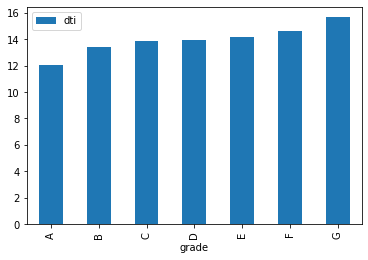

In [34]:
loan[['dti']].groupby(loan['grade']).mean().plot(kind='bar')

,funded_amnt
home_ownership,
RENT,20181
MORTGAGE,18959
OWN,3251
OTHER,136
NONE,8


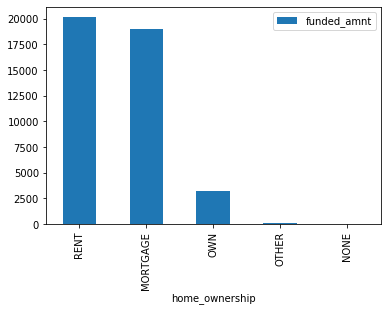

In [35]:
loan[['funded_amnt']].groupby(loan['home_ownership']).count().sort_values(['funded_amnt'],ascending=False).plot(kind='bar')
loan[['funded_amnt']].groupby(loan['home_ownership']).count().sort_values(['funded_amnt'],ascending=False)

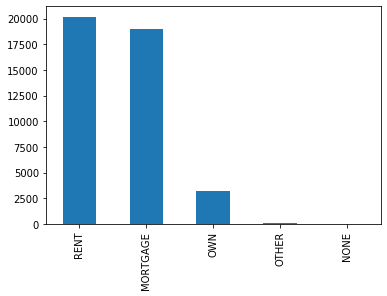

In [36]:
loan['home_ownership'].value_counts().plot(kind='bar')

#### RENTAL Home owner  are highest among all the ownership

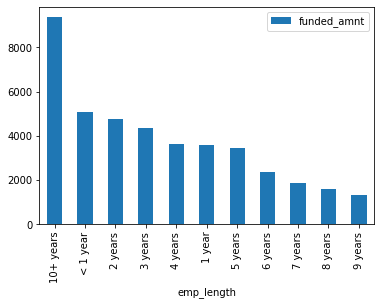

In [37]:
loan[['funded_amnt','emp_length']].groupby(['emp_length']).count().sort_values('funded_amnt',ascending=False).plot(kind='bar');

In [38]:
emp=loan[['funded_amnt','emp_length']].groupby(['emp_length']).mean().sort_values('funded_amnt',ascending=False).index
emp

Index(['10+ years', '9 years', '8 years', '7 years', '6 years', '5 years',
       '4 years', '3 years', '2 years', '1 year', '< 1 year'],
      dtype='object', name='emp_length')

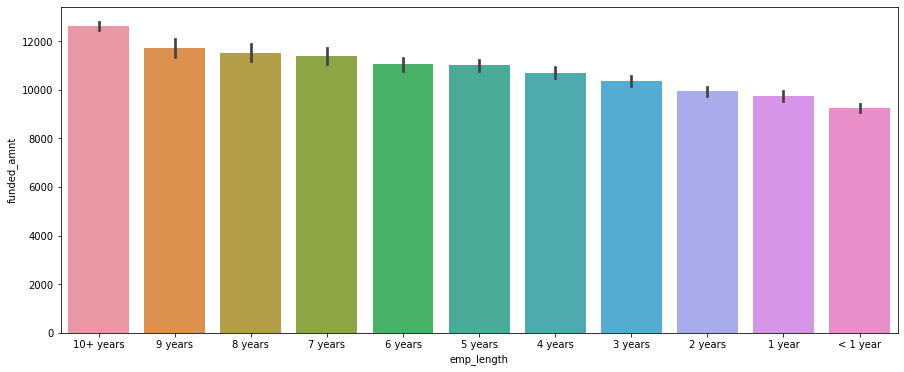

In [39]:
plt.figure(figsize=(15,6))
sns.barplot(loan['emp_length'],loan['funded_amnt'],order=emp);

In [40]:
loan['emp_length']=loan['emp_length'].str.replace('[^0-9<+]','')

In [41]:
loan['emp_length'].replace(['<1','1','2'],'0-2 years',inplace=True)
loan['emp_length'].replace(['3','4','5'],'2-5 years',inplace=True)
loan['emp_length'].replace(['6','7','8'],'5-8 years',inplace=True)
loan['emp_length'].replace(['9','10+'],'More than 9',inplace=True)

In [42]:
loan['emp_length'].value_counts()

0-2 years      13400
2-5 years      11471
More than 9    10710
5-8 years       5842
Name: emp_length, dtype: int64

0-2 years      13400
2-5 years      11471
More than 9    10710
5-8 years       5842
Name: emp_length, dtype: int64

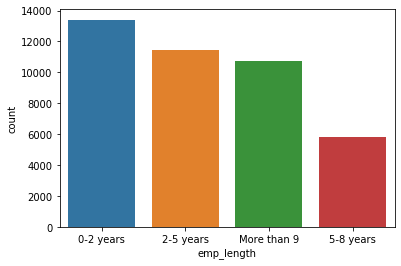

In [43]:
sns.countplot(loan['emp_length'],order=loan['emp_length'].value_counts().index);
loan['emp_length'].value_counts()

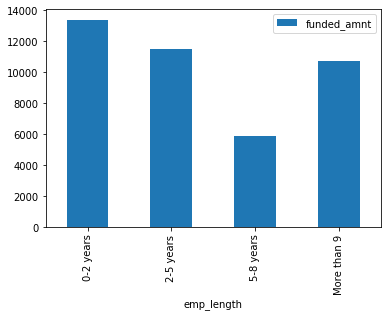

In [44]:
loan[['funded_amnt','emp_length']].groupby(['emp_length']).count().plot(kind='bar');

In [45]:
loan['emp_length'].value_counts()

0-2 years      13400
2-5 years      11471
More than 9    10710
5-8 years       5842
Name: emp_length, dtype: int64

In [46]:
loan['emp_length'].value_counts().index

Index(['0-2 years', '2-5 years', 'More than 9', '5-8 years'], dtype='object')

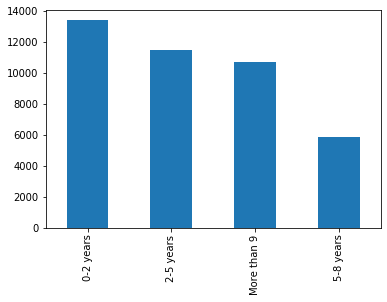

In [47]:
loan['emp_length'].value_counts().plot(kind='bar')

In [48]:
loan[['grade','emp_length','loan_amnt']].groupby(['emp_length','grade']).count()

loan_amnt
emp_length  grade           
0-2 years   A           3013
            B           3859
            C           2926
            D           1947
            E           1098
            F            389
            G            168
2-5 years   A           2694
            B           3376
            C           2368
            D           1654
            E            884
            F            355
            G            140
5-8 years   A           1427
            B           1665
            C           1202
            D            835
            E            459
            F            188
            G             66
More than 9 A           2656
            B           3145
            C           2062
            D           1460
            E            904
            F            347
            G            136

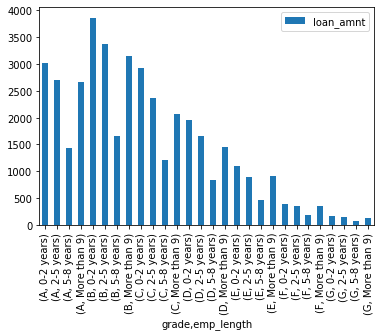

In [49]:
loan[['grade','emp_length','loan_amnt']].groupby(['grade','emp_length']).count().plot(kind='bar')

N    42375
Y      160
Name: debt_settlement_flag, dtype: int64

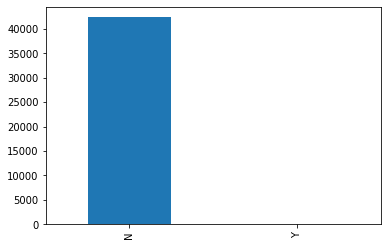

In [50]:
loan['debt_settlement_flag'].value_counts().plot(kind='bar');
loan['debt_settlement_flag'].value_counts()
# most of the debt_settlement flag are no,only 160 values are yes flas ,
# this step is also taken when some one can't repay the loan they have taken,so we cand rop this column

In [51]:
loan['application_type'].unique() #only one value can't explain the colun

array(['Individual'], dtype=object)

In [52]:
loan['pymnt_plan'].unique() # single valued column

array(['n'], dtype=object)

In [53]:
print(loan['delinq_amnt'].isnull().sum())
loan['delinq_amnt'].value_counts()
# Their are more number of rows with 0.0 value, we can drop a column that have only ne value, 
# that does not explain the column ,though their are two more values but only  once occured so we can drop this column

29


0.0       42504
6053.0        1
27.0          1
Name: delinq_amnt, dtype: int64

In [54]:
loan['delinq_amnt'].unique()

array([   0.,   nan,   27., 6053.])

In [55]:
print("Unique values in the column",loan['tax_liens'].unique())
print("-----------------------------------------")
print(loan['tax_liens'].value_counts())
print("-----------------------------------------")
print("count of null values",loan['tax_liens'].isnull().sum())
print("-----------------------------------------")
loan['tax_liens'].replace(np.nan,0.0,inplace=True)
print(loan['tax_liens'].value_counts())

Unique values in the column [ 0. nan  1.]
-----------------------------------------
0.0    42429
1.0        1
Name: tax_liens, dtype: int64
-----------------------------------------
count of null values 105
-----------------------------------------
0.0    42534
1.0        1
Name: tax_liens, dtype: int64


In [56]:
print("Unique values in the column",loan['delinq_amnt'].unique())
print("-----------------------------------------")
print(loan['delinq_amnt'].value_counts())
print("-----------------------------------------")
print("count of null values",loan['delinq_amnt'].isnull().sum())
loan['delinq_amnt'].replace(np.nan,0.0,inplace=True)
print("-----------------------------------------")
print(loan['delinq_amnt'].value_counts())


Unique values in the column [   0.   nan   27. 6053.]
-----------------------------------------
0.0       42504
6053.0        1
27.0          1
Name: delinq_amnt, dtype: int64
-----------------------------------------
count of null values 29
-----------------------------------------
0.0       42533
6053.0        1
27.0          1
Name: delinq_amnt, dtype: int64


In [57]:
print("Unique values in the column",loan['debt_settlement_flag'].unique())
print("-----------------------------------------")
print(loan['debt_settlement_flag'].value_counts())
print("-----------------------------------------")
print("count of null values",loan['debt_settlement_flag'].isnull().sum())

Unique values in the column ['N' 'Y']
-----------------------------------------
N    42375
Y      160
Name: debt_settlement_flag, dtype: int64
-----------------------------------------
count of null values 0


In [58]:
print(loan['pymnt_plan'].unique())
print(loan['pymnt_plan'].value_counts())
print(loan['pymnt_plan'].isnull().sum())

['n']
n    42535
Name: pymnt_plan, dtype: int64
0


In [59]:
loan.drop('hardship_flag',axis=1,inplace=True)
loan.drop('issued_month',axis=1,inplace=True)
loan.drop('zip_code',axis=1,inplace=True)
loan.drop('application_type',axis=1,inplace=True)  # ONLY one value is present so we can drop the columns
loan.drop('pymnt_plan',axis=1,inplace=True)
loan.drop('sub_grade',axis=1,inplace=True)
loan.drop('next_pymnt_d',axis=1,inplace=True) # more than 40% are null values
loan.drop('desc',axis=1,inplace=True)

In [60]:
loan['delinq_2yrs'].unique()

array([ 0.,  2.,  3.,  1.,  4.,  6.,  5.,  8.,  7.,  9., 11., nan, 13.])

In [61]:
type(loan['delinq_2yrs'].values[1])

numpy.float64

In [62]:
loan['delinq_2yrs'].replace(np.nan,0.0,inplace=True)

In [63]:
loan['inq_last_6mths'].unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19., nan])

In [64]:
loan['loan_status']=loan['loan_status'].replace(('Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off'),('Fully Paid', 'Charged Off'))

loan['loan_status'].head(5)

0     Fully Paid
1    Charged Off
2     Fully Paid
3     Fully Paid
4     Fully Paid
Name: loan_status, dtype: object

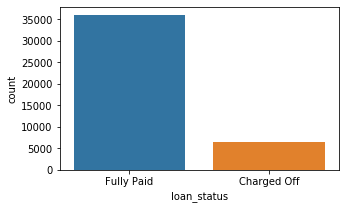

In [65]:
plt.figure(figsize=(5,3))
sns.countplot(loan['loan_status']);

In [66]:
loan['loan_status'].value_counts()

Fully Paid     36104
Charged Off     6431
Name: loan_status, dtype: int64

NORTH-EAST    11539
WEST          10906
SOUTH-EAST     9583
MID-WEST       6137
SOUTH-WEST     4370
Name: addr_state, dtype: int64

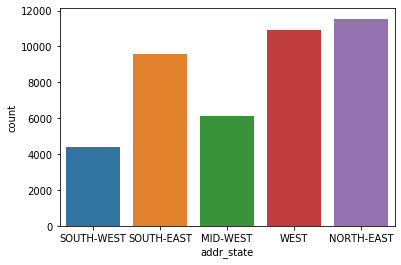

In [67]:
loan['addr_state'].replace(['WA','OR','ID','MT','WY','CO','UT','NV','CA'],'WEST',inplace=True)
loan['addr_state'].replace(['ND','MN','WI','MI','OH','IN','IL','MO','KS','NE','SD','IA'],'MID-WEST',inplace=True)
loan['addr_state'].replace(['MD','PA','NY','VT','ME','NH','MA','RI','CT','NJ'],'NORTH-EAST',inplace=True)
loan['addr_state'].replace(['DE','DC','WV','VA','NC','SC','GA','FL','KL','AL','MS','LA','AR','TN','KY'],'SOUTH-EAST',inplace=True)
loan['addr_state'].replace(['TX','OK','NM','AZ'],'SOUTH-WEST',inplace=True)
loan['addr_state'].replace(['HI','AK'],'WEST',inplace=True)

sns.countplot(loan['addr_state']);
loan['addr_state'].value_counts()

In [68]:
loan[['funded_amnt','addr_state']].groupby(loan['addr_state']).sum().sort_values('funded_amnt',ascending=False)

,funded_amnt
addr_state,
NORTH-EAST,125653850.0
WEST,119053775.0
SOUTH-EAST,102177275.0
MID-WEST,65144475.0
SOUTH-WEST,48266775.0


In [69]:
loan[['annual_inc','addr_state']].groupby(loan['addr_state']).sum().sort_values('annual_inc',ascending=False)

,annual_inc
addr_state,
NORTH-EAST,8.285993e+08
WEST,7.648145e+08
SOUTH-EAST,6.423808e+08
MID-WEST,3.897565e+08
SOUTH-WEST,3.148958e+08


In [70]:
R=loan['addr_state'].groupby(loan['addr_state']).count().sort_values(ascending=False)

In [71]:
R

addr_state
NORTH-EAST    11539
WEST          10906
SOUTH-EAST     9583
MID-WEST       6137
SOUTH-WEST     4370
Name: addr_state, dtype: int64

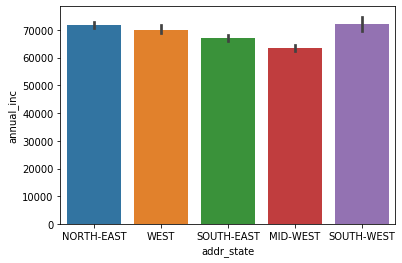

In [72]:
sns.barplot(loan['addr_state'],loan['annual_inc'],order=R.index);

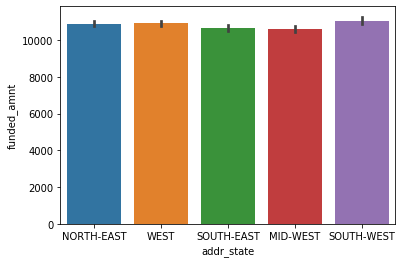

In [73]:
sns.barplot(loan['addr_state'],loan['funded_amnt'],order=R.index);

In [74]:
loan['monthly_inc']=loan['annual_inc']/12

In [75]:
loan.shape

(42535, 46)

In [76]:
loan['emp_length'].unique()[:4]

array(['More than 9', '0-2 years', '2-5 years', '5-8 years'], dtype=object)

In [77]:
loan=loan.loc[loan['emp_length'].isin(['More than 9', '0-2 years', '2-5 years', '5-8 years'])]

In [78]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    38321
1.0     1729
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [79]:
loan['title'].replace(np.nan,'no title',inplace=True)

In [80]:
loan.drop('title',axis=1,inplace=True)

In [81]:
loan['open_acc'].isnull().sum(),loan['emp_title'].isnull().sum()

(29, 1571)

In [82]:
loan['emp_title'].value_counts()[0:5]

US Army              139
Bank of America      115
IBM                   72
Kaiser Permanente     61
AT&T                  61
Name: emp_title, dtype: int64

In [83]:
loan.drop('emp_title',axis=1,inplace=True)

In [84]:
loan['annual_inc']=loan['annual_inc'].fillna(loan['annual_inc'].median())

In [85]:
loan.drop([42452, 42453, 42483, 42536],axis=0,inplace=True)

In [86]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    38321
1.0     1729
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [87]:
loan['pub_rec_bankruptcies'].isnull().sum()

1361

In [88]:
loan['pub_rec_bankruptcies'].replace(np.nan,3.0,inplace=True)

In [89]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    38321
1.0     1729
3.0     1361
2.0        8
Name: pub_rec_bankruptcies, dtype: int64

In [90]:
loan.drop('pub_rec_bankruptcies',axis=1,inplace=True)

In [91]:
loan['acc_now_delinq'].value_counts() # single value can not explain about the column so we are droping this column

0.0    41390
1.0        4
Name: acc_now_delinq, dtype: int64

In [92]:
loan.shape

(41419, 43)

In [93]:
loan.drop('acc_now_delinq',axis=1,inplace=True)

In [94]:
loan.shape

(41419, 42)

In [95]:
loan.drop('last_credit_pull_d',axis=1,inplace=True)

In [96]:
loan['delinq_2yrs'].value_counts()

0.0     36792
1.0      3515
2.0       751
3.0       238
4.0        71
5.0        26
6.0        13
7.0         6
8.0         3
11.0        2
13.0        1
9.0         1
Name: delinq_2yrs, dtype: int64

In [97]:
loan['delinq_2yrs'].dtype

dtype('float64')

In [98]:
loan.drop('total_pymnt',axis=1,inplace=True)

In [99]:
loan[['loan_amnt','total_pymnt_inv','total_rec_int','total_rec_late_fee','total_rec_prncp']].head()

,loan_amnt,total_pymnt_inv,total_rec_int,total_rec_late_fee,total_rec_prncp
0,5000.0,5833.84,863.16,0.00,5000.00
1,2500.0,1014.53,435.17,0.00,456.46
2,2400.0,3005.67,605.67,0.00,2400.00
3,10000.0,12231.89,2214.92,16.97,10000.00
4,3000.0,4066.91,1066.91,0.00,3000.00


In [100]:
loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [101]:
loan['loan_status']=loan['loan_status'].str.replace('Fully Paid','0')
loan['loan_status']=loan['loan_status'].str.replace('Charged Off','1')
loan['loan_status']=loan['loan_status'].str.replace('Does not meet the credit policy. Status:0','0')
loan['loan_status']=loan['loan_status'].str.replace('Does not meet the credit policy. Status:1','1')

In [102]:
loan['loan_status'].unique()

array(['0', '1'], dtype=object)

In [103]:
df=loan.copy()

In [104]:
loan['loan_status']=loan['loan_status'].astype(int)

In [105]:
loan['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [106]:
type(loan['purpose'].values[1])

str

In [107]:
p=loan['purpose'].value_counts()
p

debt_consolidation    19363
credit_card            5344
other                  4255
home_improvement       3099
major_purchase         2238
small_business         1946
car                    1563
wedding                 991
medical                 726
moving                  603
educational             413
house                   412
vacation                368
renewable_energy         98
Name: purpose, dtype: int64

In [108]:
p=(loan['purpose'].value_counts()/41419*100)

In [109]:
p.values,p.index

(array([46.74907651, 12.90229122, 10.27306309,  7.48207344,  5.40331732,
         4.69832685,  3.77363046,  2.39262174,  1.75281875,  1.45585359,
         0.99712692,  0.99471257,  0.88848113,  0.23660639]),
 Index(['debt_consolidation', 'credit_card', 'other', 'home_improvement',
        'major_purchase', 'small_business', 'car', 'wedding', 'medical',
        'moving', 'educational', 'house', 'vacation', 'renewable_energy'],
       dtype='object'))

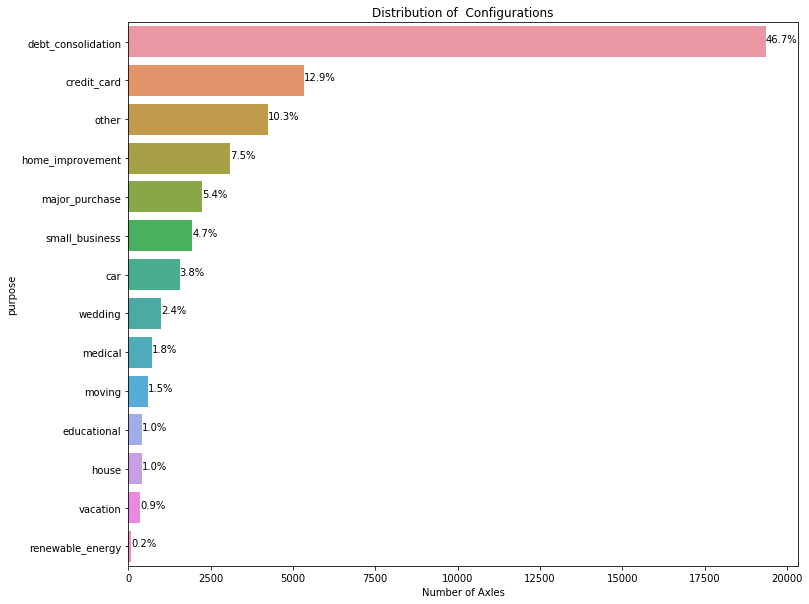

In [110]:
plt.figure(figsize=(12,10))
ax = sns.countplot(y="purpose", data=loan,order=p.index)
plt.title('Distribution of  Configurations')
plt.xlabel('Number of Axles')

total = len(loan['purpose'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [111]:
loan['revol_util'].sort_values().unique()

array(['0%', '0.01%', '0.03%', ..., '99.80%', '99.90%', nan], dtype=object)

In [112]:
loan['revol_util'].isnull().sum()

83

In [113]:
loan['revol_util'].replace(np.nan,'0',inplace=True)

In [114]:
loan['revol_util'].sort_values().unique()

array(['0', '0%', '0.01%', ..., '99.70%', '99.80%', '99.90%'],
      dtype=object)

In [115]:
loan['revol_util']=loan['revol_util'].str.replace("%","")

In [116]:
loan['revol_util']=loan['revol_util'].astype('float64')

In [117]:
loan['revol_util'].dtype

dtype('float64')

In [118]:
loan['initial_list_status'].unique()

array(['f'], dtype=object)

In [119]:
loan.drop('initial_list_status',axis=1,inplace=True)

In [120]:
loan.shape

(41419, 39)

In [121]:
loan['grade'].sort_values().unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [122]:
loan['total_acc'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78.,
       79., 80., 81., 87., 90., nan])

In [123]:
loan[['grade','total_acc']].isnull().sum()

grade         0
total_acc    25
dtype: int64

In [124]:
loan['total_acc'][(loan['grade']=='A')& (loan['total_acc'].isnull())]=23

c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [125]:
loan['total_acc'][(loan['grade']=='B')& (loan['total_acc'].isnull())]=round(loan['total_acc'][(loan['grade']=='B')].mean())
loan['total_acc'][(loan['grade']=='C')& (loan['total_acc'].isnull())]=round(loan['total_acc'][(loan['grade']=='C')].mean())
loan['total_acc'][(loan['grade']=='D')& (loan['total_acc'].isnull())]=round(loan['total_acc'][(loan['grade']=='D')].mean())
loan['total_acc'][(loan['grade']=='E')& (loan['total_acc'].isnull())]=round(loan['total_acc'][(loan['grade']=='E')].mean())
loan['total_acc'][(loan['grade']=='F')& (loan['total_acc'].isnull())]=round(loan['total_acc'][(loan['grade']=='F')].mean())
loan['total_acc'][(loan['grade']=='G')& (loan['total_acc'].isnull())]=round(loan['total_acc'][(loan['grade']=='G')].mean())

c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This i

In [126]:
loan['total_acc'].isnull().sum()

0

In [127]:
loan.isnull().sum()[loan.isnull().sum().values>0]

earliest_cr_line    25
inq_last_6mths      25
open_acc            25
pub_rec             25
last_pymnt_d        78
dtype: int64

In [128]:
loan.shape

(41419, 39)

In [129]:
data=loan.copy()

In [130]:
loan['tax_liens'].value_counts()

0.0    41418
1.0        1
Name: tax_liens, dtype: int64

In [131]:
loan.drop('tax_liens',axis=1,inplace=True)

In [132]:
loan['inq_last_6mths'].unique()

array([ 1.,  5.,  2.,  0.,  3.,  4.,  6.,  7.,  8.,  9., 10., 11., 12.,
       15., 14., 33., 17., 32., 24., 13., 18., 16., 31., 28., 25., 27.,
       20., 19., nan])

In [133]:
loan['pub_rec'].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5., nan])

In [134]:
loan['pub_rec'].value_counts()

0.0    39148
1.0     2170
2.0       62
3.0       11
4.0        2
5.0        1
Name: pub_rec, dtype: int64

In [135]:
loan['pub_rec'].isnull().sum()

25

In [136]:
loan['pub_rec'].replace(np.nan,0.0,inplace=True)

In [137]:
loan['pub_rec'].value_counts()

0.0    39173
1.0     2170
2.0       62
3.0       11
4.0        2
5.0        1
Name: pub_rec, dtype: int64

In [138]:
loan['out_prncp_inv'].unique()

array([0.])

In [139]:
loan.drop(['out_prncp','out_prncp_inv'],axis=1,inplace=True)

In [140]:
loan.shape

(41419, 36)

In [141]:
obj=[]
for i in loan.columns:
    if loan[i].dtype=='object':
        obj.append(i)      

obj

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'debt_settlement_flag']

In [142]:
loan['purpose']=loan['purpose'].astype(str)

In [143]:
loan['term']=loan['term'].str.replace("months","")

In [144]:
loan.shape

(41419, 36)

In [145]:
obj

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'purpose',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'debt_settlement_flag']

In [146]:
loan['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [147]:
loan['issue_d'].replace(('Dec-07','Nov-07','Oct-07','Sep-07','Aug-07','Jul-07','Jun-07'),2007,inplace=True)

In [148]:
loan['issue_d'].replace(('Dec-11','Nov-11','Oct-11','Sep-11','Aug-11','Jul-11','Jun-11','May-11','Apr-11','Mar-11','Feb-11','Jan-11'),2011,inplace=True)

In [149]:
loan['issue_d'].replace(('Dec-10','Nov-10','Oct-10','Sep-10','Aug-10','Jul-10','Jun-10','May-10','Apr-10','Mar-10','Feb-10','Jan-10'),2010,inplace=True)

In [150]:
loan['issue_d'].replace(('Dec-09','Nov-09','Oct-09','Sep-09','Aug-09','Jul-09','Jun-09','May-09','Apr-09','Mar-09','Feb-09','Jan-09'),2009,inplace=True)

In [151]:
loan['issue_d'].replace(('Dec-08','Nov-08','Oct-08','Sep-08','Aug-08','Jul-08','Jun-08','May-08','Apr-08','Mar-08','Feb-08','Jan-08',),2008,inplace=True)

In [152]:
loan['issue_d'].unique()

array([2011, 2010, 2009, 2008, 2007], dtype=int64)

In [153]:
loan.shape

(41419, 36)

In [154]:
loan.isnull().sum().values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       25, 25, 25,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 78,  0,  0,  0,
        0,  0], dtype=int64)

In [155]:
data1=loan.dropna(axis=0).copy()

In [156]:
numeric=[]
for i in data1.columns:
    if (loan[i].dtype=='float64')|(loan[i].dtype=='int32'):
        numeric.append(i)

In [157]:
corr=loan.corr()

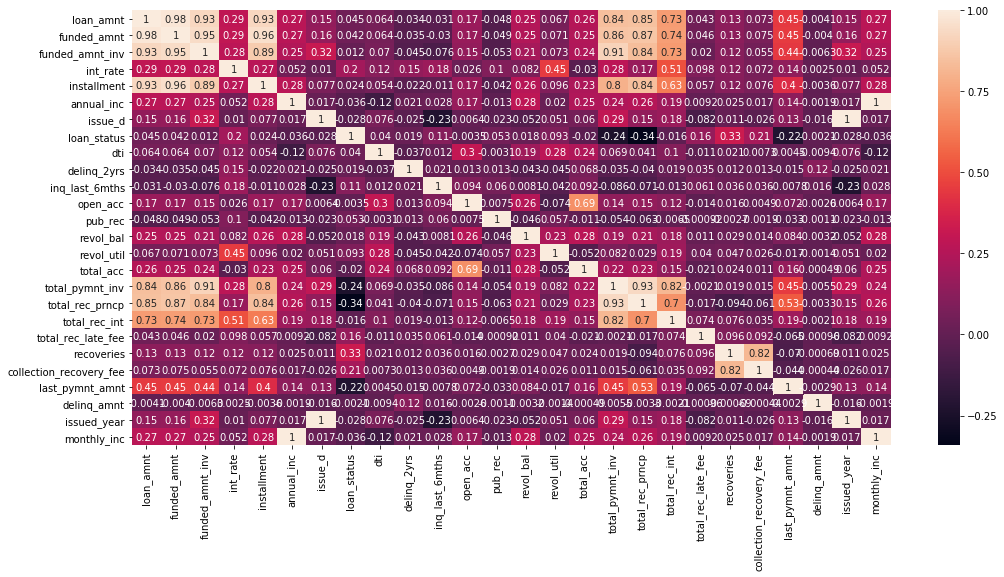

In [158]:
plt.figure(figsize=(17,8))
sns.heatmap(corr,annot=True);

In [159]:
num=[]
for i in data1.columns:
    if (loan[i].dtype=='float64')|(loan[i].dtype=='int32'):
        num.append(i)

In [160]:
data1.isnull().sum().values,data1.isnull().sum().shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), (36,))

In [161]:
loan['issue_d'].unique()

array([2011, 2010, 2009, 2008, 2007], dtype=int64)

In [162]:
obj=[]
for i in data1.columns:
    if data1[i].dtype=='object':
        obj.append(i)      

In [163]:
data1.shape,loan.shape

((41316, 36), (41419, 36))

In [164]:
len(obj)

10

In [165]:
data1.shape

(41316, 36)

In [166]:
for i in obj:
    print(i,len(data1[i].unique()))

term 2
grade 7
emp_length 4
home_ownership 5
verification_status 3
purpose 14
addr_state 5
earliest_cr_line 519
last_pymnt_d 112
debt_settlement_flag 2


In [167]:
from scipy.stats import chi2,chi2_contingency
for i in obj:
    contingency_table = pd.crosstab(data1['loan_status'],data1[i],margins = True)
    stat,p,dof,expected=chi2_contingency(contingency_table)
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        print(i,'Dependent (reject H0)')
        print(i,'P-value',round(p,3))
    else:
        print(i, 'Independent (fail to reject H0)')
        print(i,'P-value',round(p,3))
    

    

term Dependent (reject H0)
term P-value 0.0
grade Dependent (reject H0)
grade P-value 0.0
emp_length Independent (fail to reject H0)
emp_length P-value 0.269
home_ownership Dependent (reject H0)
home_ownership P-value 0.031
verification_status Dependent (reject H0)
verification_status P-value 0.0
purpose Dependent (reject H0)
purpose P-value 0.0
addr_state Dependent (reject H0)
addr_state P-value 0.0
earliest_cr_line Independent (fail to reject H0)
earliest_cr_line P-value 1.0
last_pymnt_d Dependent (reject H0)
last_pymnt_d P-value 0.0
debt_settlement_flag Dependent (reject H0)
debt_settlement_flag P-value 0.0


In [168]:
train=data1.drop(['loan_status','earliest_cr_line','last_pymnt_d'],axis=1)

In [169]:
train.shape

(41316, 33)

In [170]:
obj1=[]
for i in train.columns:
    if train[i].dtype=='object':
        obj1.append(i)      
print(obj1)
print("number of object are:",len(obj1),"\n")
for i in obj1:
    print(i,":",len(train[i].unique()))


['term', 'grade', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'debt_settlement_flag']
number of object are: 8 

term : 2
grade : 7
emp_length : 4
home_ownership : 5
verification_status : 3
purpose : 14
addr_state : 5
debt_settlement_flag : 2


In [171]:
train.shape

(41316, 33)

In [172]:
dummy=pd.get_dummies(train,columns=[i for i in obj1], prefix = [i for i in obj1],drop_first=True) 

In [173]:
dummy.shape

(41316, 59)

In [174]:
y=data1['loan_status']

In [175]:
from sklearn.model_selection import train_test_split     

In [176]:
xtrain,xtest,ytrain,ytest=train_test_split(dummy,y,test_size=0.3,random_state=0)    #splitting in to train and test

In [177]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape,train.shape

((28921, 59), (12395, 59), (28921,), (12395,), (41316, 33))

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [179]:
LR = LogisticRegression()

In [180]:
sc=StandardScaler()

In [181]:
xtrain_sc=sc.fit_transform(xtrain)

In [182]:
xtest_sc=sc.transform(xtest)

In [183]:
xtrain_sc.shape

(28921, 59)

In [184]:
LR.fit(xtrain_sc,ytrain)

c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:
lr_pred=LR.predict(xtest_sc)
lr_proba=LR.predict_proba(xtest_sc)
print(accuracy_score(ytest,lr_pred))
print("f1 score",f1_score(ytest,lr_pred))
print(confusion_matrix(ytest,lr_pred))
print(classification_report(ytest,lr_pred))
tn, fp, fn, tp =confusion_matrix(ytest,lr_pred).ravel()
print(tn,fp,fn,tp)

0.9931423961274708
f1 score 0.9763165227082753
[[10558     0]
 [   85  1752]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     10558
           1       1.00      0.95      0.98      1837

    accuracy                           0.99     12395
   macro avg       1.00      0.98      0.99     12395
weighted avg       0.99      0.99      0.99     12395

10558 0 85 1752


In [186]:
dummy.shape

(41316, 59)

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
xtrain1,xtest1,ytrain1,ytest1=train_test_split(dummy,y,test_size=0.3,random_state=0)

In [189]:
xtrain1.shape,xtest1.shape,ytrain1.shape,ytest1.shape

((28921, 59), (12395, 59), (28921,), (12395,))

In [190]:
sc1=StandardScaler()                                                               #scaling the data

xtrain_sc1=pd.DataFrame(sc1.fit_transform(xtrain1),columns=xtrain1.columns)

xtest_sc1=pd.DataFrame(sc1.transform(xtest1),columns=xtest1.columns)


In [191]:
ytrain1.value_counts()        #value counts before application of smote

0    24653
1     4268
Name: loan_status, dtype: int64

In [192]:
from imblearn.over_sampling import SMOTE                  #applying smote
smt = SMOTE()
x_train, y_train = smt.fit_sample(xtrain_sc1, ytrain1)

In [193]:
xtrain_sc1.shape,x_train.shape,y_train.shape

((28921, 59), (49306, 59), (49306,))

In [194]:
len(dummy)

41316

In [195]:
W=pd.DataFrame(y_train,columns=['SMOTE_VALUES'])

In [196]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score,f1_score

In [197]:
from sklearn.linear_model import LogisticRegression

In [198]:
LR=LogisticRegression()        #fitting classification model

LRM=LR.fit(x_train,y_train)

LR_pred=LRM.predict(xtest_sc1)

LRacc=accuracy_score(ytest1,LR_pred)
f1=f1_score(ytest1,LR_pred)
print(LRacc)
print(f1)

LRCl=classification_report(ytest1,LR_pred)
LRcm=confusion_matrix(ytest1,LR_pred)
tn, fp, fn, tp =confusion_matrix(ytest1,LR_pred).ravel()


print(LRcm)
print(LRCl)

c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9966922146026623
0.9887269727797635
[[10556     2]
 [   39  1798]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10558
           1       1.00      0.98      0.99      1837

    accuracy                           1.00     12395
   macro avg       1.00      0.99      0.99     12395
weighted avg       1.00      1.00      1.00     12395



In [199]:
LR_pred.shape,ytest1.shape,xtest_sc1.shape

((12395,), (12395,), (12395, 59))

In [200]:
LR_pred

array([0, 1, 0, ..., 0, 0, 0])

In [201]:
(tn,fp,fn,tp)

(10556, 2, 39, 1798)

In [202]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [203]:
RFC=RandomForestClassifier()
ABC=AdaBoostClassifier(n_estimators=100)
GBC=GradientBoostingClassifier()

c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy 0.9966922146026623
f1 Score 0.9887269727797635
[[10556     2]
 [   39  1798]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10558
           1       1.00      0.98      0.99      1837

    accuracy                           1.00     12395
   macro avg       1.00      0.99      0.99     12395
weighted avg       1.00      1.00      1.00     12395



c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy 0.9993545784590561
f1 Score 0.9978177850518276
[[10558     0]
 [    8  1829]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10558
           1       1.00      1.00      1.00      1837

    accuracy                           1.00     12395
   macro avg       1.00      1.00      1.00     12395
weighted avg       1.00      1.00      1.00     12395

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                

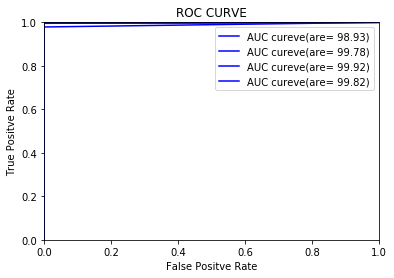

In [204]:
models=[LR,RFC,ABC,GBC]
for a in models:
    a.fit(x_train,y_train)
    predict=a.predict(xtest_sc1)
    Accuracy=accuracy_score(ytest1,predict)
    f1=f1_score(ytest1,predict)
    cm=confusion_matrix(ytest1,predict)
    cr=classification_report(ytest1,predict)

    
    
    print(a)
    print("Accuracy",Accuracy)
    print("f1 Score",f1)

    print(cm)
    print(cr)
    fpr,tpr,thresh=roc_curve(ytest1,predict)
    plt.plot(fpr,tpr,color='blue',label="AUC cureve(are= %0.2f)" %round(auc(fpr,tpr)*100,2))
    plt.xlabel("False Positve Rate")
    plt.ylabel("True Positve Rate")
    plt.title("ROC CURVE",)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.legend()



    

In [205]:
np.mean(xtrain_sc1)

loan_amnt                             -7.454207e-17
funded_amnt                            4.863776e-18
funded_amnt_inv                       -1.829194e-17
int_rate                              -5.863556e-16
installment                           -1.696448e-16
annual_inc                             5.911676e-17
issue_d                               -4.220208e-14
dti                                   -1.880596e-16
delinq_2yrs                           -1.945000e-15
inq_last_6mths                         1.577215e-16
open_acc                              -1.228454e-16
pub_rec                                2.063727e-16
revol_bal                             -8.747850e-17
revol_util                            -9.723713e-17
total_acc                              1.124619e-16
total_pymnt_inv                       -6.758998e-17
total_rec_prncp                       -2.567859e-16
total_rec_int                          3.585835e-17
total_rec_late_fee                    -1.089232e-15
recoveries  

In [206]:
np.std(xtrain_sc1)

loan_amnt                              1.0
funded_amnt                            1.0
funded_amnt_inv                        1.0
int_rate                               1.0
installment                            1.0
annual_inc                             1.0
issue_d                                1.0
dti                                    1.0
delinq_2yrs                            1.0
inq_last_6mths                         1.0
open_acc                               1.0
pub_rec                                1.0
revol_bal                              1.0
revol_util                             1.0
total_acc                              1.0
total_pymnt_inv                        1.0
total_rec_prncp                        1.0
total_rec_int                          1.0
total_rec_late_fee                     1.0
recoveries                             1.0
collection_recovery_fee                1.0
last_pymnt_amnt                        1.0
delinq_amnt                            1.0
issued_year

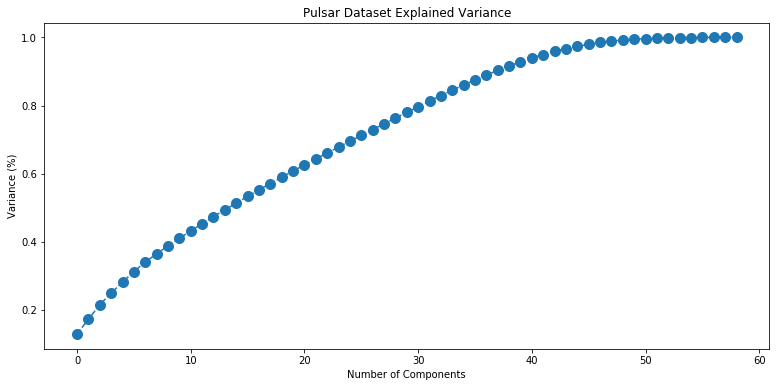

In [207]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(xtrain_sc1)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize=(13,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),linestyle='dashed',markersize=20,marker='.')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [208]:
pc=PCA(n_components=35) 
# 35 components acquire 85% of variance in the data
pca_train=pc.fit_transform(xtrain_sc1)
pca_test=pc.transform(xtest_sc1)
pc.explained_variance_
np.cumsum(pc.explained_variance_ratio_)

array([0.12881977, 0.17187507, 0.21475449, 0.24887163, 0.28137968,
       0.3121356 , 0.34005308, 0.36445503, 0.38743992, 0.40983771,
       0.43156572, 0.45285308, 0.47353561, 0.49357397, 0.51350718,
       0.53300754, 0.55217903, 0.57091318, 0.58943517, 0.60755976,
       0.62550771, 0.64316   , 0.66054691, 0.67784274, 0.69511354,
       0.71226122, 0.72931173, 0.74619619, 0.76298622, 0.77972679,
       0.79640515, 0.81283692, 0.82909139, 0.84498816, 0.8601852 ])

####  Default model using pca

c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
f1 score 0.906643254316652 

0.9742638160548608
[[10527    31]
 [  288  1549]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     10558
           1       0.98      0.84      0.91      1837

    accuracy                           0.97     12395
   macro avg       0.98      0.92      0.95     12395
weighted avg       0.97      0.97      0.97     12395



c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
f1 score 0.3589108910891089 

0.8746268656716418
[[10406   152]
 [ 1402   435]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10558
           1       0.74      0.24      0.36      1837

    accuracy                           0.87     12395
   macro avg       0.81      0.61      0.64     12395
weighted avg       0.86      0.87      0.85     12395

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rat

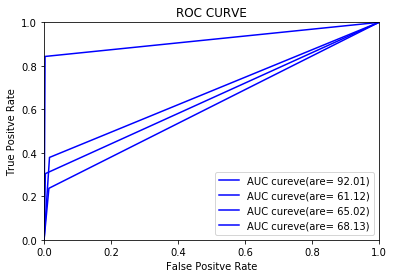

In [209]:
rfc1=RandomForestClassifier()
gbc1=GradientBoostingClassifier()
abc1=AdaBoostClassifier()
logR1=LogisticRegression()
models=[logR1,rfc1,gbc1,abc1]
pred=[]
#name=[random forest,Gradiant boost,Adaboost,Logistic Regression]

for a in models:
    a.fit(pca_train,ytrain1)
    predict=a.predict(pca_test)
    Accuracy=accuracy_score(ytest1,predict)
    f1=f1_score(ytest1,predict)
    cm=confusion_matrix(ytest1,predict)
    cr=classification_report(ytest1,predict)
#    kuppa=cohen_kappa_score(ytest1,predict)
    pred.append(predict)
    print(a)
    print("f1 score",f1,"\n")
    print(Accuracy)
 #   print(kuppa)
    print(cm)
    print(cr)
    fpr,tpr,thresh=roc_curve(ytest1,predict)
    plt.plot(fpr,tpr,color='blue',label="AUC cureve(are= %0.2f)" %round(auc(fpr,tpr)*100,2))
    plt.xlabel("False Positve Rate")
    plt.ylabel("True Positve Rate")
    plt.title("ROC CURVE",)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.legend()




In [210]:
pred[0].shape

(12395,)

In [211]:
fpr_LR,tpr_LR,thresh_LR=roc_curve(ytest1,pred[0])
fpr_RF,tpr_RF,thresh_RF=roc_curve(ytest1,pred[1])
fpr_GB,tpr_GB,thresh_GB=roc_curve(ytest1,pred[2])
fpr_AD,tpr_AD,thresh_AD=roc_curve(ytest1,pred[3])

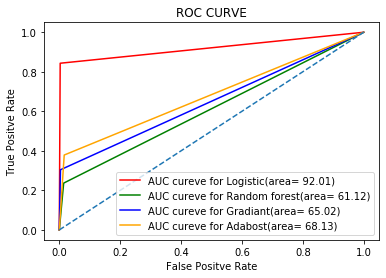

In [212]:
plt.plot(fpr_LR,tpr_LR,color='red',label="AUC cureve for Logistic(area= %0.2f)" %round(auc(fpr_LR,tpr_LR)*100,2))
plt.plot(fpr_RF,tpr_RF,color='green',label="AUC cureve for Random forest(area= %0.2f)" %round(auc(fpr_RF,tpr_RF)*100,2))
plt.plot(fpr_GB,tpr_GB,color='blue',label="AUC cureve for Gradiant(area= %0.2f)" %round(auc(fpr_GB,tpr_GB)*100,2))
plt.plot(fpr_AD,tpr_AD,color='orange',label="AUC cureve for Adabost(area= %0.2f)" %round(auc(fpr_AD,tpr_AD)*100,2))
plt.xlabel("False Positve Rate")
plt.ylabel("True Positve Rate")
plt.title("ROC CURVE",)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend()


#### Model with n estimators

c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.9742638160548608
f1 score 0.906643254316652 

[[10527    31]
 [  288  1549]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     10558
           1       0.98      0.84      0.91      1837

    accuracy                           0.97     12395
   macro avg       0.98      0.92      0.95     12395
weighted avg       0.97      0.97      0.97     12395



c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8759983864461477
f1 score 0.36982369823698236 

[[10407   151]
 [ 1386   451]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93     10558
           1       0.75      0.25      0.37      1837

    accuracy                           0.88     12395
   macro avg       0.82      0.62      0.65     12395
weighted avg       0.86      0.88      0.85     12395

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_ra

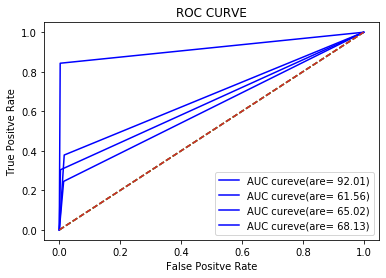

In [216]:
rfc1=RandomForestClassifier()
gbc1=GradientBoostingClassifier()
abc1=AdaBoostClassifier(n_estimators=50)
logR1=LogisticRegression()
models=[logR1,rfc1,gbc1,abc1]
#name=[random forest,Gradiant boost,Adaboost,Logistic Regression]

for a in models:
    a.fit(pca_train,ytrain1)
    predict=a.predict(pca_test)
    Accuracy=accuracy_score(ytest1,predict)
    f1=f1_score(ytest1,predict)
    cm=confusion_matrix(ytest1,predict)
    cr=classification_report(ytest1,predict)

    
    print(a)
    print(Accuracy)
    print("f1 score",f1,"\n")

    print(cm)
    print(cr)
    fpr,tpr,thresh=roc_curve(ytest1,predict)
    plt.plot(fpr,tpr,color='blue',label="AUC cureve(are= %0.2f)" %round(auc(fpr,tpr)*100,2))
    plt.xlabel("False Positve Rate")
    plt.ylabel("True Positve Rate")
    plt.title("ROC CURVE",)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.legend()



    
 

Based on above model we com to conclusion that Logistic model after PCA  is the best model based on the precesion score,area under the AUC cureve

In [217]:
from sklearn.metrics import log_loss

In [218]:
## predict probabilities
probs1 =LR.predict_proba(xtest_sc)
# keep the predictions for class 1 only
probability1= probs1[:, 1]
# calculate log loss
loss = log_loss(ytest, probs1)

In [219]:
p1=pd.DataFrame(probability1,columns=['prob'])

#### Test

In [220]:
probs1

array([[9.98297048e-01, 1.70295249e-03],
       [2.29704040e-02, 9.77029596e-01],
       [9.99439764e-01, 5.60235764e-04],
       ...,
       [9.85007746e-01, 1.49922539e-02],
       [9.99996315e-01, 3.68520132e-06],
       [9.99999803e-01, 1.97374485e-07]])

In [221]:
p1.shape

(12395, 1)

In [222]:
xtest.shape

(12395, 59)

In [223]:
xtest['prob']=p1

c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [224]:
xtest

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,inq_last_6mths,...,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_NORTH-EAST,addr_state_SOUTH-EAST,addr_state_SOUTH-WEST,addr_state_WEST,debt_settlement_flag_Y,prob
5913,20000.0,20000.0,20000.000000,18.64,514.86,45000.00,2011,22.35,0.0,1.0,...,0,0,0,0,0,1,0,0,0,3.862073e-03
27840,1600.0,1600.0,1600.000000,15.21,38.25,58900.00,2010,12.27,0.0,2.0,...,0,0,0,0,0,1,0,0,0,NaN
38345,25000.0,25000.0,10758.724380,15.25,869.70,135000.00,2008,15.56,0.0,0.0,...,0,1,0,0,0,0,0,1,0,NaN
25173,8000.0,8000.0,8000.000000,16.32,195.91,40000.00,2010,1.66,0.0,2.0,...,0,0,0,0,1,0,0,0,0,NaN
37515,17000.0,17000.0,9551.460000,12.21,566.36,80000.00,2009,7.93,0.0,1.0,...,0,0,0,0,1,0,0,0,0,NaN
21460,6000.0,6000.0,6000.000000,18.54,154.13,55929.00,2011,18.41,0.0,5.0,...,0,0,0,0,0,0,0,1,0,NaN
10586,18000.0,18000.0,17950.000000,13.49,414.09,160000.00,2011,28.35,0.0,0.0,...,0,0,0,0,1,0,0,0,0,4.036867e-02
25611,3000.0,3000.0,3000.000000,6.39,91.80,107000.00,2010,8.37,0.0,0.0,...,0,0,0,0,1,0,0,0,0,NaN
10338,31300.0,31300.0,31300.000000,18.79,808.33,73500.00,2011,17.57,0.0,2.0,...,0,0,0,0,0,1,0,0,0,9.917554e-01
2399,35000.0,35000.0,34975.000000,22.35,973.64,65000.00,2011,12.37,0.0,3.0,...,0,0,0,0,0,0,1,0,0,1.779393e-03


In [225]:
p2=xtest.copy()

In [226]:
p2.set_index(np.arange(len(xtest)),inplace=True)

In [227]:
p2['prob']=p1

In [228]:
p2.shape

(12395, 60)

In [229]:
LR_pred.shape,xtest_sc1.shape

((12395,), (12395, 59))

In [230]:
LR=LogisticRegression()        #fitting classification model

LRM=LR.fit(x_train,y_train)

LR_pred=LRM.predict(xtest_sc1)

LRacc=accuracy_score(ytest1,LR_pred)
f1=f1_score(ytest1,LR_pred)
print(LRacc)
print(f1)

LRCl=classification_report(ytest1,LR_pred)
LRcm=confusion_matrix(ytest1,LR_pred)
tn, fp, fn, tp =confusion_matrix(ytest1,LR_pred).ravel()


print(LRcm)
print(LRCl)

c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9966922146026623
0.9887269727797635
[[10556     2]
 [   39  1798]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10558
           1       1.00      0.98      0.99      1837

    accuracy                           1.00     12395
   macro avg       1.00      0.99      0.99     12395
weighted avg       1.00      1.00      1.00     12395



In [231]:
LR_pred.shape

(12395,)

In [232]:
Pred_test=pd.DataFrame(LR_pred,columns=['prediction'])

In [233]:
p2['prediction']=Pred_test

In [234]:
p2['prediction'].isnull().sum()

0

In [235]:
project=p2.copy()

In [236]:
project.to_csv("project.csv",index=False)

c:\users\gowtham\appdata\local\programs\python\python36\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


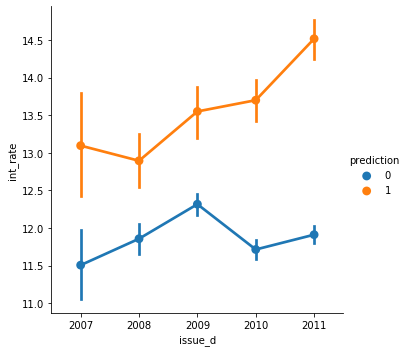

In [237]:
sns.factorplot('issue_d','int_rate',data=project,hue='prediction');

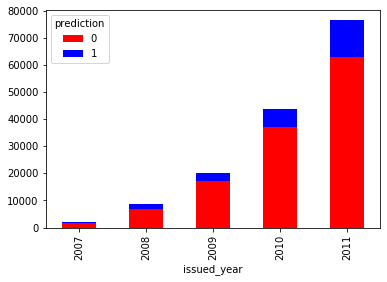

In [238]:
var = project.groupby(['issued_year','prediction']).int_rate.sum()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)

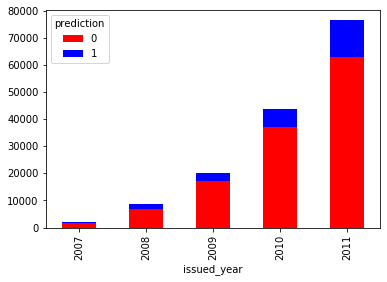

In [239]:
var = project.groupby(['issued_year','prediction']).int_rate.sum()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)

In [240]:
project[['annual_inc','issued_year','prediction']].groupby(['issued_year','prediction']).sum()/project.groupby(['issued_year']).sum()*100


addr_state_NORTH-EAST  addr_state_SOUTH-EAST  \
issued_year prediction                                                 
2007        0                             NaN                    NaN   
            1                             NaN                    NaN   
2008        0                             NaN                    NaN   
            1                             NaN                    NaN   
2009        0                             NaN                    NaN   
            1                             NaN                    NaN   
2010        0                             NaN                    NaN   
            1                             NaN                    NaN   
2011        0                             NaN                    NaN   
            1                             NaN                    NaN   

                        addr_state_SOUTH-WEST  addr_state_WEST  annual_inc  \
issued_year prediction                                                       
2007        0                             NaN              NaN   73.400657   
            1                             NaN              NaN   26.599343   
2008        0                             NaN              NaN   79.075895   
            1                             NaN              NaN   20.924105   
2009        0                             NaN              NaN   88.044184   
            1                             NaN              NaN   11.955816   
2010        0                             NaN              NaN   87.533012   
            1                             NaN              NaN   12.466988   
2011        0                             NaN              NaN   86.657467   
            1                             NaN              NaN   13.342533   

                        collection_recovery_fee  debt_settlement_flag_Y  \
issued_year prediction                                                    
2007        0                               NaN                     NaN   
            1                               NaN                     NaN   
2008        0                               NaN                     NaN   
            1                               NaN                     NaN   
2009        0                               NaN                     NaN   
            1                               NaN                     NaN   
2010        0                               NaN                     NaN   
            1                               NaN                     NaN   
2011        0                               NaN                     NaN   
            1                               NaN                     NaN   

                        delinq_2yrs  delinq_amnt  dti  ...  revol_bal  \
issued_year prediction                                 ...              
2007        0                   NaN          NaN  NaN  ...        NaN   
            1                   NaN          NaN  NaN  ...        NaN   
2008        0                   NaN          NaN  NaN  ...        NaN   
            1                   NaN          NaN  NaN  ...        NaN   
2009        0                   NaN          NaN  NaN  ...        NaN   
            1                   NaN          NaN  NaN  ...        NaN   
2010        0                   NaN          NaN  NaN  ...        NaN   
            1                   NaN          NaN  NaN  ...        NaN   
2011        0                   NaN          NaN  NaN  ...        NaN   
            1                   NaN          NaN  NaN  ...        NaN   

                        revol_util  term_ 60   total_acc  total_pymnt_inv  \
issued_year prediction                                                      
2007        0                  NaN        NaN        NaN              NaN   
            1                  NaN        NaN        NaN              NaN   
2008        0                  NaN        NaN        NaN              NaN   
            1                  NaN        NaN        NaN   

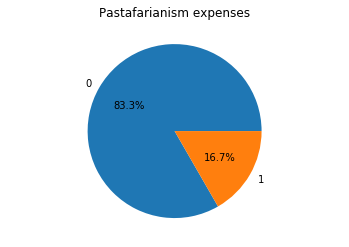

In [241]:
var=project.groupby(['prediction']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['int_rate']
label_list = temp.index
plt.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%")
plt.title("Pastafarianism expenses") 
plt.show()

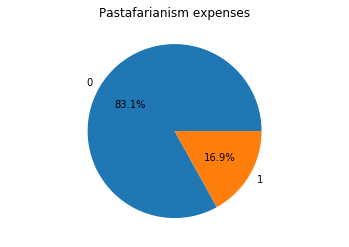

In [242]:
var=data1.groupby(['loan_status']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['int_rate']
label_list = temp.index
plt.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%")
plt.title("Pastafarianism expenses") 
plt.show()

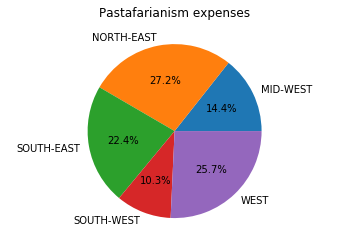

In [243]:
var=data1.groupby(['addr_state']).sum().stack()
temp=var.unstack()
type(temp)
x_list = temp['int_rate']
label_list = temp.index
plt.axis("equal") #The pie chart is oval by default. To make it a circle use pyplot.axis("equal")
#To show the percentage of each pie slice, pass an output format to the autopctparameter 
plt.pie(x_list,labels=label_list,autopct="%1.1f%%")
plt.title("Pastafarianism expenses") 
plt.show()

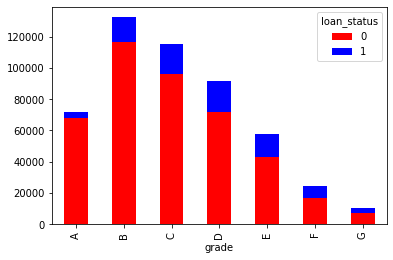

In [244]:
var = data1.groupby(['grade','loan_status']).int_rate.sum()
var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)


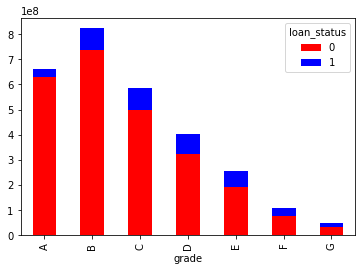

In [245]:
var = data1.groupby(['grade','loan_status']).annual_inc.sum()
ax=var.unstack().plot(kind='bar',stacked=True,  color=['red','blue'], grid=False)


In [246]:
data1['grade'].groupby(data1['grade']).count().sum()

41316

In [247]:
A=data1['grade'].groupby(data1['grade']).count().sort_values(ascending=False)/41316 *100

In [248]:
A.index

Index(['B', 'A', 'C', 'D', 'E', 'F', 'G'], dtype='object', name='grade')

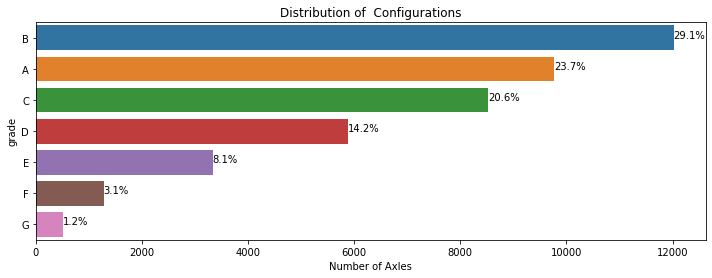

In [249]:
plt.figure(figsize=(12,4))
ax = sns.countplot(y="grade", data=data1,order=A.index)
plt.title('Distribution of  Configurations')
plt.xlabel('Number of Axles')

total = len(data1['grade'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

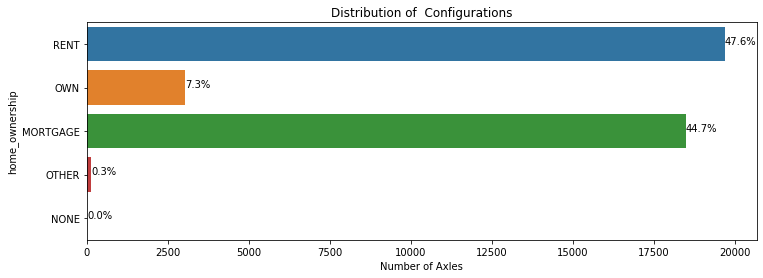

In [250]:
plt.figure(figsize=(12,4))
ax = sns.countplot(y="home_ownership", data=data1)
plt.title('Distribution of  Configurations')
plt.xlabel('Number of Axles')

total = len(data1['home_ownership'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

In [251]:
data1.groupby(["loan_status"]).int_rate.count()

loan_status
0    35211
1     6105
Name: int_rate, dtype: int64

In [252]:
A=project[['int_rate','dti','prob']].sort_values(['prob'],ascending=[False])

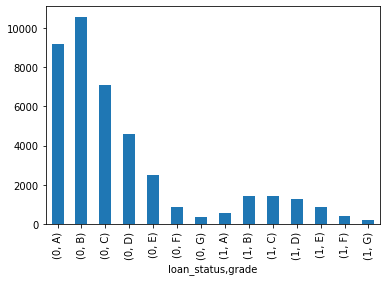

In [253]:
data1.groupby(['loan_status','grade']).annual_inc.count().plot(kind='bar')

In [255]:
from sklearn.feature_selection import chi2,f_classif,SelectKBest
from sklearn.model_selection import StratifiedKFold

In [258]:
data1[['issued_year','loan_status']].groupby(['issued_year','loan_status']).count()

Empty DataFrame
Columns: []
Index: [(2007, 0), (2007, 1), (2008, 0), (2008, 1), (2009, 0), (2009, 1), (2010, 0), (2010, 1), (2011, 0), (2011, 1)]

[Text(0, 0.5, '(%)')]

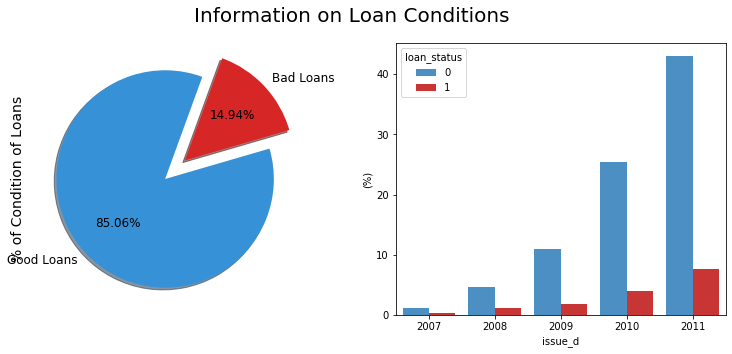

In [287]:
f, ax = plt.subplots(1,2, figsize=(13,5))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

loan["loan_status"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_status', data=loan, ax=ax[0], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
# palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="issue_d", y="int_rate", hue="loan_status", data=loan, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

[Text(0, 0.5, '(%)')]

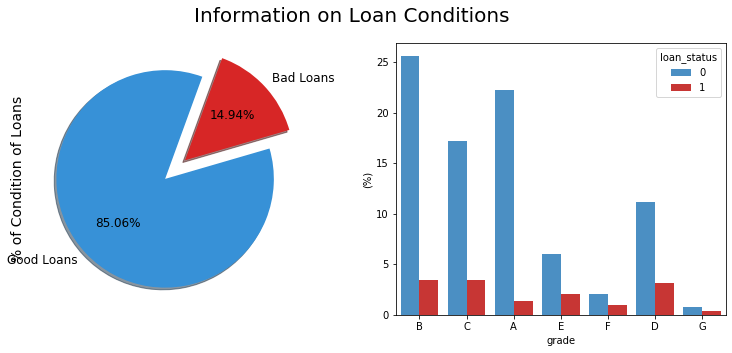

In [291]:
f, ax = plt.subplots(1,2, figsize=(13,5))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

loan["loan_status"].value_counts().sort_values(ascending=False).plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_status', data=loan, ax=ax[0], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
# palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="grade", y="int_rate", hue="loan_status", data=loan, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

In [330]:
LP.count()

int_rate
loan_status purpose                     
0           car                     1395
            credit_card             4760
            debt_consolidation     16373
            educational              329
            home_improvement        2696
            house                    342
            major_purchase          2005
            medical                  605
            moving                   505
            other                   3535
            renewable_energy          79
            small_business          1408
            vacation                 315
            wedding                  886
1           car                      168
            credit_card              584
            debt_consolidation      2990
            educational               84
            home_improvement         403
            house                     70
            major_purchase           233
            medical                  121
            moving                    98
            other                    720
            renewable_energy          19
            small_business           538
            vacation                  53
            wedding                  105

In [292]:
loan['loan_status'].unique()

array([0, 1], dtype=int64)

In [293]:
df=loan.copy()

In [297]:
badloans_df = df.loc[df["loan_status"] == 1]
badloans_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,delinq_amnt,debt_settlement_flag,issued_year,monthly_inc
1,2500.0,2500.0,2500.0,60,15.27,59.83,C,0-2 years,RENT,30000.0,...,435.17,0.0,122.90,1.1100,Apr-13,119.66,0.0,N,2011,2500.000000
8,5600.0,5600.0,5600.0,60,21.28,152.39,F,2-5 years,OWN,40000.0,...,294.94,0.0,190.54,2.0900,Apr-12,152.39,0.0,N,2011,3333.333333
9,5375.0,5375.0,5350.0,60,12.69,121.45,B,0-2 years,RENT,15000.0,...,533.42,0.0,277.69,2.5200,Nov-12,121.45,0.0,N,2011,1250.000000
12,9000.0,9000.0,9000.0,36,13.49,305.38,C,0-2 years,RENT,30000.0,...,570.26,0.0,450.92,4.1600,Jul-12,305.38,0.0,N,2011,2500.000000
14,10000.0,10000.0,10000.0,36,10.65,325.74,B,2-5 years,RENT,100000.0,...,1393.42,0.0,645.10,6.3145,Oct-13,325.74,0.0,N,2011,8333.333333


In [309]:

# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['addr_state'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['addr_state'], badloans_df['loan_status'])

loan_status_cross

loan_status,1
addr_state,
MID-WEST,13.934691
NORTH-EAST,25.428387
SOUTH-EAST,23.488522
SOUTH-WEST,9.359845
WEST,27.788555


In [ ]:
loan[['issued_year','purpose','term']].groupby(['issued_year','term']).mean()

In [340]:
loan[['loan_status','purpose','int_rate']].groupby(['loan_status','purpose']).count().sort_values(['loan_status',"int_rate"],ascending=[False,False])

int_rate
loan_status purpose                     
1           debt_consolidation      2990
            other                    720
            credit_card              584
            small_business           538
            home_improvement         403
            major_purchase           233
            car                      168
            medical                  121
            wedding                  105
            moving                    98
            educational               84
            house                     70
            vacation                  53
            renewable_energy          19
0           debt_consolidation     16373
            credit_card             4760
            other                   3535
            home_improvement        2696
            major_purchase          2005
            small_business          1408
            car                     1395
            wedding                  886
            medical                  605
            moving                   505
            house                    342
            educational              329
            vacation                 315
            renewable_energy          79

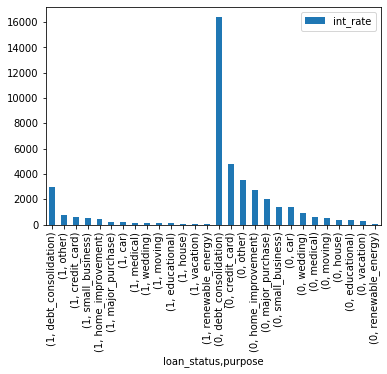

In [342]:

loan[['loan_status','purpose','int_rate']].groupby(['loan_status','purpose']).count().sort_values(['loan_status',"int_rate"],ascending=[False,False]).plot(kind='bar');

<Figure size 1080x432 with 0 Axes>

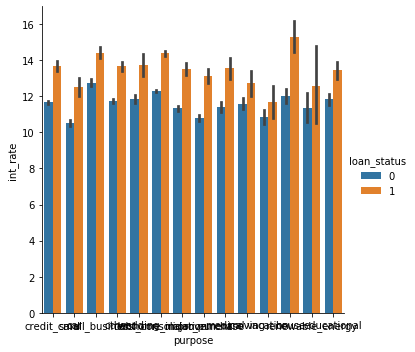

In [345]:
sns.catplot('purpose','int_rate',hue='loan_status',data=loan,kind='bar',r);

[Text(0, 0.5, '(%)')]

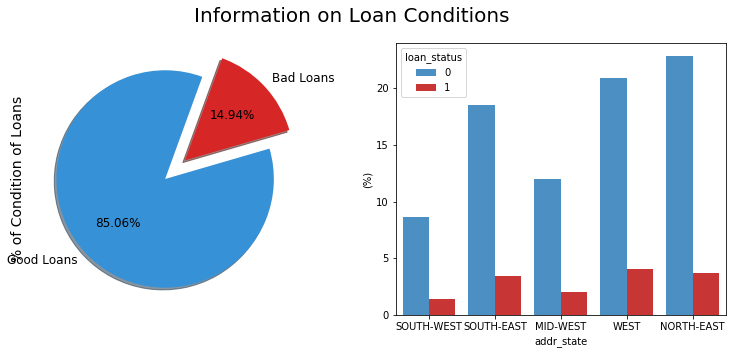

In [348]:
f, ax = plt.subplots(1,2, figsize=(13,5))

colors = ["#3791D7", "#D72626"]
labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

loan["loan_status"].value_counts().sort_values(ascending=False).plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=70)


# ax[0].set_title('State of Loan', fontsize=16)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

# sns.countplot('loan_status', data=loan, ax=ax[0], palette=colors)
# ax[1].set_title('Condition of Loans', fontsize=20)
# ax[1].set_xticklabels(['Good', 'Bad'], rotation='horizontal')
# palette = ["#3791D7", "#E01E1B"]

sns.barplot(x="addr_state", y="int_rate", hue="loan_status", data=loan, palette=palette, estimator=lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel="(%)")

In [359]:
A=loan[['addr_state','loan_status','purpose','funded_amnt']].groupby(['loan_status','addr_state','purpose']).count().sort_values(['loan_status','addr_state','funded_amnt'],ascending=[False,True,False])

In [361]:
A.to_csv('A.csv')